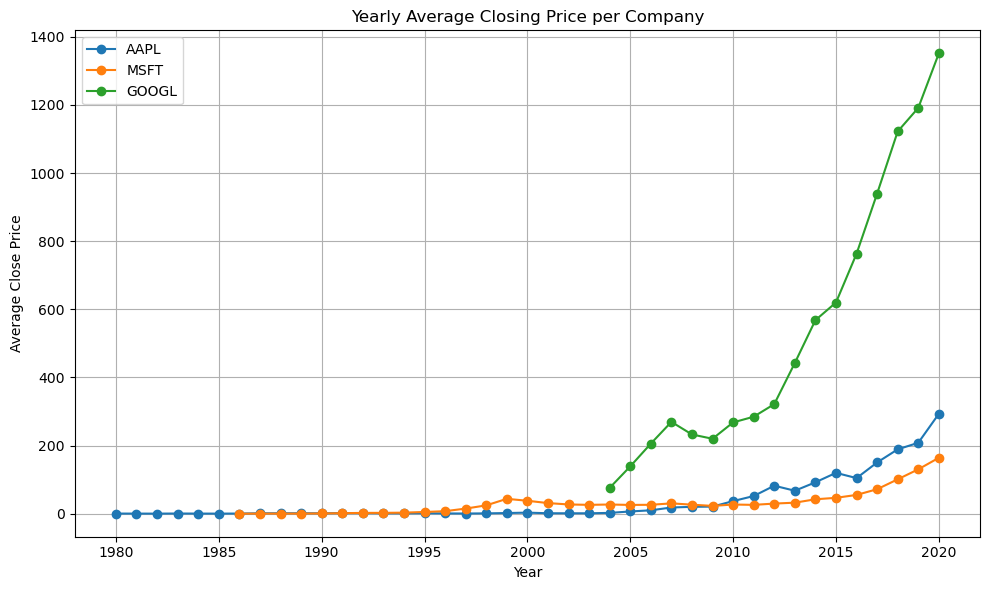

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
fact = pd.read_csv("fact_stock_prices.csv")
dim_date = pd.read_csv("dim_date.csv")

# Merge and convert date
fact["Date"] = pd.to_datetime(fact["Date"])
dim_date["Date"] = pd.to_datetime(dim_date["Date"])
df = fact.merge(dim_date, on="Date")

# Group by Year and Symbol
yearly_avg = df.groupby(["Symbol", "Year"])["Close"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
for symbol in ["AAPL", "MSFT", "GOOGL"]:
    sub = yearly_avg[yearly_avg["Symbol"] == symbol]
    plt.plot(sub["Year"], sub["Close"], marker="o", label=symbol)

plt.title("Yearly Average Closing Price per Company")
plt.xlabel("Year")
plt.ylabel("Average Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


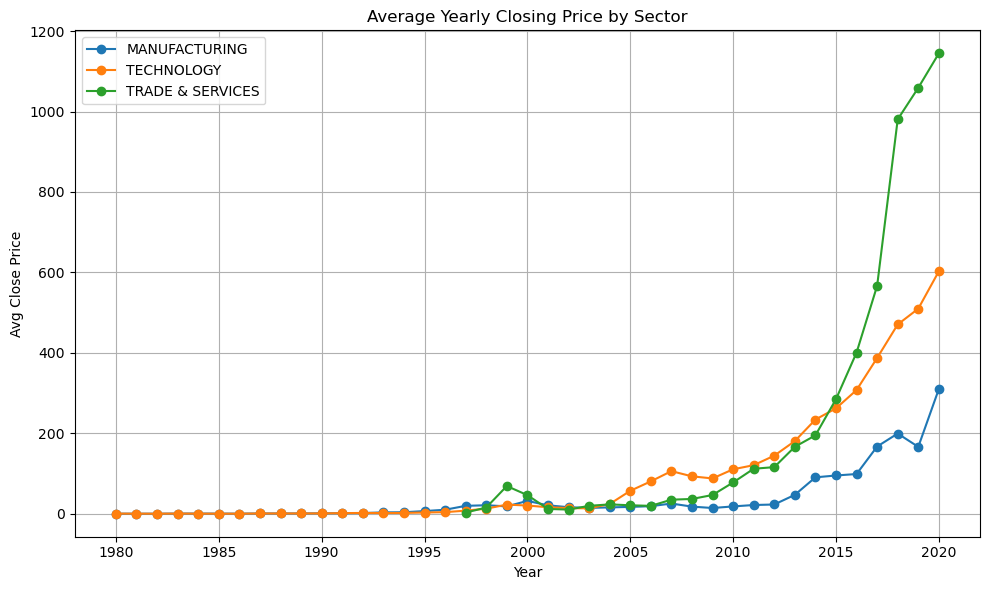

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

fact = pd.read_csv("fact_stock_prices.csv")
dim_date = pd.read_csv("dim_date.csv")
dim_company = pd.read_csv("dim_company.csv")

fact["Date"] = pd.to_datetime(fact["Date"])
dim_date["Date"] = pd.to_datetime(dim_date["Date"])

df = fact.merge(dim_date, on="Date").merge(dim_company[["Symbol", "Sector"]], on="Symbol")
yearly_avg = df.groupby(["Year", "Sector"])["Close"].mean().reset_index()
pivot_df = yearly_avg.pivot(index="Year", columns="Sector", values="Close")

plt.figure(figsize=(10, 6))
for sector in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[sector], marker='o', label=sector)

plt.title("Average Yearly Closing Price by Sector")
plt.xlabel("Year")
plt.ylabel("Avg Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


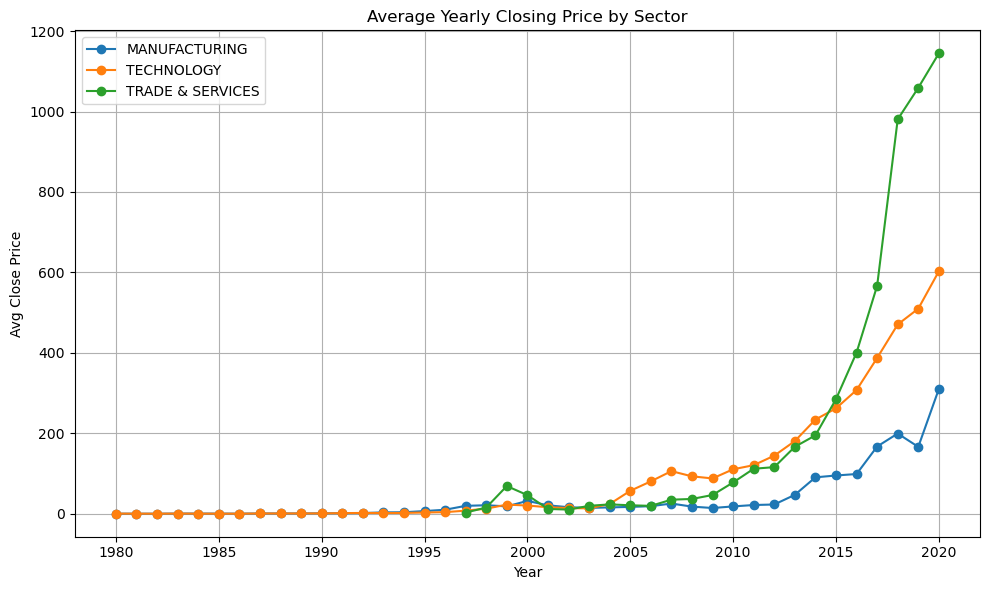

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

fact = pd.read_csv("fact_stock_prices.csv")
dim_date = pd.read_csv("dim_date.csv")
dim_company = pd.read_csv("dim_company.csv")

fact["Date"] = pd.to_datetime(fact["Date"])
dim_date["Date"] = pd.to_datetime(dim_date["Date"])

df = fact.merge(dim_date, on="Date").merge(dim_company[["Symbol", "Sector"]], on="Symbol")
yearly_avg = df.groupby(["Year", "Sector"])["Close"].mean().reset_index()
pivot_df = yearly_avg.pivot(index="Year", columns="Sector", values="Close")

plt.figure(figsize=(10, 6))
for sector in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[sector], marker='o', label=sector)

plt.title("Average Yearly Closing Price by Sector")
plt.xlabel("Year")
plt.ylabel("Avg Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


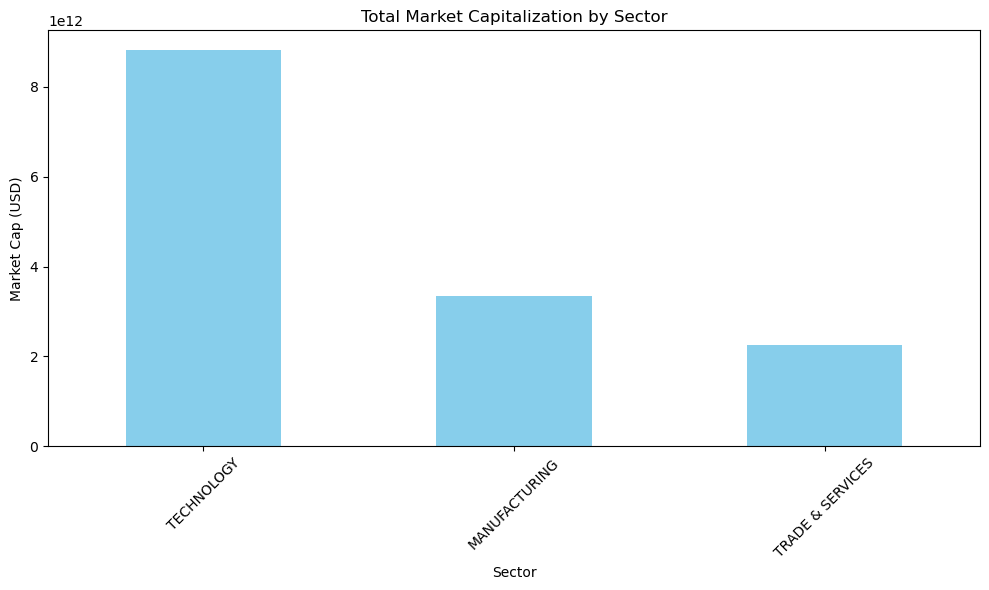

In [11]:
sector_cap = dim_company.groupby("Sector")["MarketCapitalization"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sector_cap.plot(kind='bar', color='skyblue')
plt.title("Total Market Capitalization by Sector")
plt.xlabel("Sector")
plt.ylabel("Market Cap (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


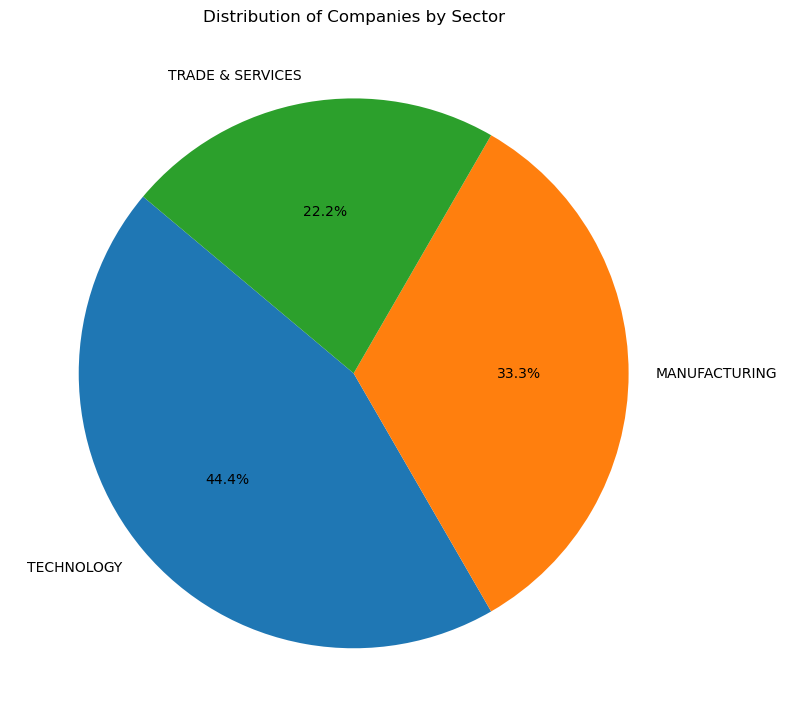

In [12]:
sector_count = dim_company["Sector"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sector_count, labels=sector_count.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Companies by Sector")
plt.tight_layout()
plt.show()


C:\Users\mdarf\AppData\Local\Temp\ipykernel_13324\3915219649.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(volatility_by_sector.tolist(), labels=volatility_by_sector.index)


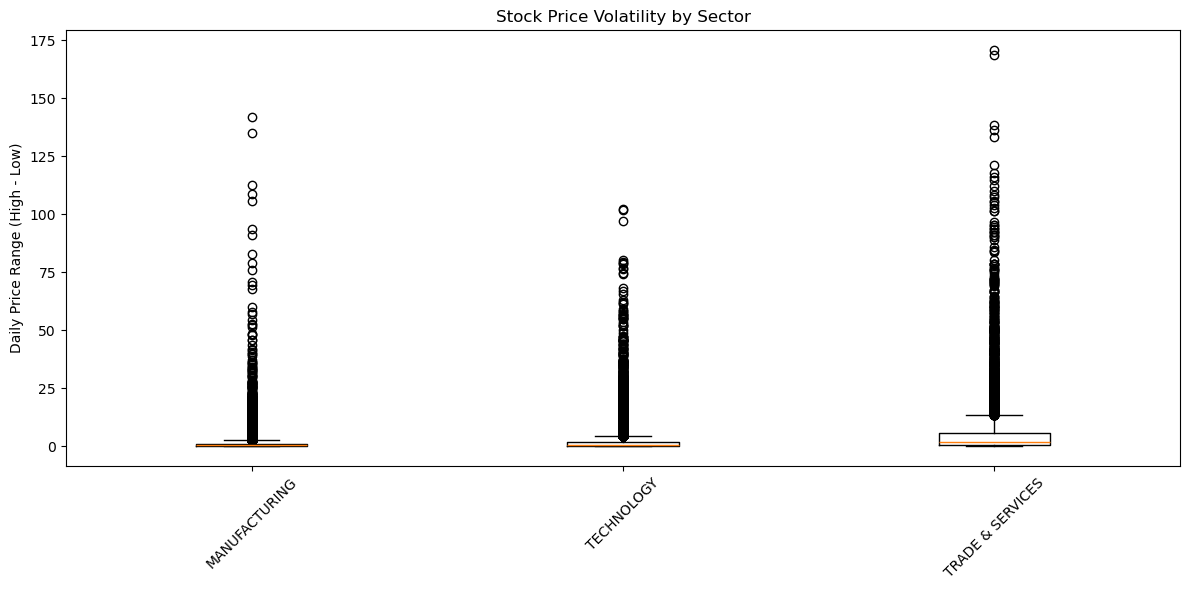

In [14]:
df["Volatility"] = df["High"] - df["Low"]
volatility_by_sector = df.groupby("Sector")["Volatility"].apply(list)

plt.figure(figsize=(12, 6))
plt.boxplot(volatility_by_sector.tolist(), labels=volatility_by_sector.index)
plt.title("Stock Price Volatility by Sector")
plt.ylabel("Daily Price Range (High - Low)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



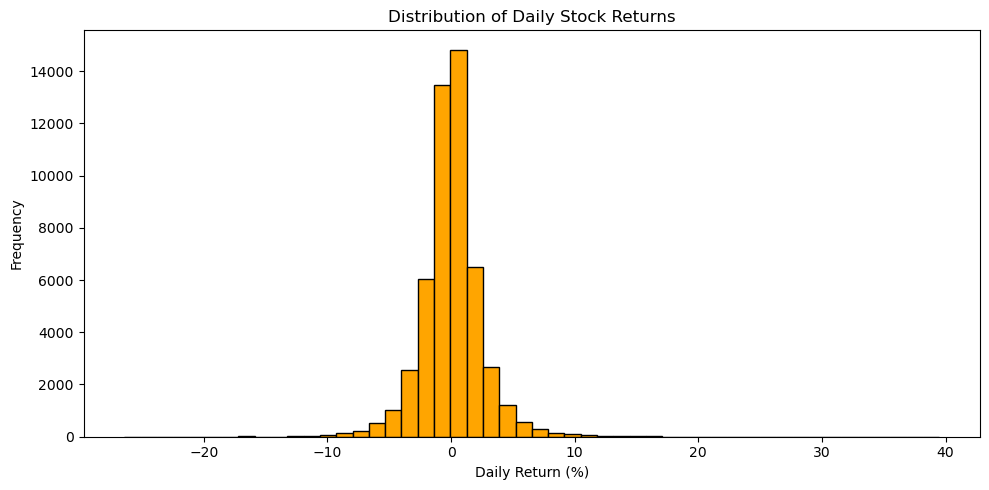

In [15]:
fact["Return"] = (fact["Close"] - fact["Open"]) / fact["Open"] * 100
plt.figure(figsize=(10, 5))
plt.hist(fact["Return"].dropna(), bins=50, color="orange", edgecolor="black")
plt.title("Distribution of Daily Stock Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
